<a href="https://colab.research.google.com/github/Genullz/Stroke-Prediction/blob/main/02_Core_Project_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import the Packages

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn import set_config
set_config(display='diagram')

Load the Dataset

In [4]:
path = ('/content/drive/MyDrive/Data Science Bootcamp/Core Project 02/healthcare-dataset-stroke-data.csv')
df = pd.read_csv(path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
# check for duplicates
df.duplicated().sum()

0

In [7]:
# Check for Missing Values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Address inconsistent Values

In [17]:
# Change the age column from an object to an integer
df['age'] = df['age'].astype(float)

In [18]:
# encoding the smoking status column
df['smoking_status'].replace({'Unknown':0, 'smokes':1, 'formerly smoked':2, 'never smoked':3}, inplace=True)

In [19]:
# encoding the residence type column
df['Residence_type'].replace({'Rural': 0, 'Urban': 1}, inplace=True)

In [20]:
# encoding the work type column
df['work_type'].replace({'children': 0, 'Self-employed': 1, 'Private': 2, 'Govt_job': 3}, inplace=True)

In [21]:
# encoding the gender column
df['gender'].replace({'Female': 0, 'Male': 1}, inplace=True)

In [23]:
# encoding the ever_married column
df['ever_married'].replace({'No': 0, 'Yes': 1}, inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 479.2+ KB


##Prepare the dataset

In [32]:
#identify
X = df.drop(columns='stroke', axis=1)
y = df['stroke']
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [55]:
#instantiate SimpleImputers with most_frequent and mean strategies
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

In [59]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include = 'number')

In [60]:
# make pipeline
num_pipe = make_pipeline(mean_imputer, scaler)

In [61]:
# create tuples of (imputer, selector) for each datatype
num_tuple = (num_pipe, num_selector)

In [66]:
preprocessor = make_column_transformer(num_tuple, remainder='drop')
preprocessor

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f86ad42ad90>)])

In [70]:
# fit ColumnTransformer on the training data
preprocessor.fit(X_train, y_train)

# transform both the training and testing data (this will output a NumPy array)
X_train_imputed = preprocessor.transform(X_train)
X_test_imputed = preprocessor.transform(X_test)

In [71]:
X_train_imputed

array([[-0.05586109,  0.7372167 ,  3.1393509 , ...,  2.82330103,
         1.92630727,  1.09909132],
       [-1.55735572, -0.10654894, -0.31853719, ..., -0.48981357,
        -0.05081958,  0.30277483],
       [ 1.05981112,  0.38194696, -0.31853719, ..., -0.41189936,
         0.20932869,  0.30277483],
       ...,
       [-0.23289776, -1.87579225, -0.31853719, ..., -0.19686495,
        -1.44261283, -1.28985817],
       [ 1.20509871,  1.62539105, -0.31853719, ...,  1.97768977,
         0.27436576,  0.30277483],
       [-0.35363905,  0.11549465, -0.31853719, ..., -0.13369722,
         2.78479656, -0.49354167]])

##Creating multivariate (multiple variables) exploratory visualizations to further understand your data and search for trends

In [72]:
corr = df.corr()

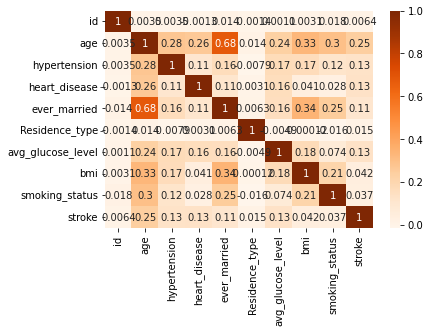

In [78]:
# the heatmap
sns.heatmap(corr, cmap = 'Oranges', annot = True);

The is a moderate correlation between a age and marital status in this dataset with value of 0.68.

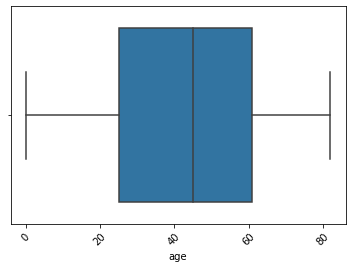

In [76]:
# boxplot
sns.boxplot(data=df, x='age');
plt.xticks(rotation = 45);

The average mean of age of the patient in our dataset is 45.

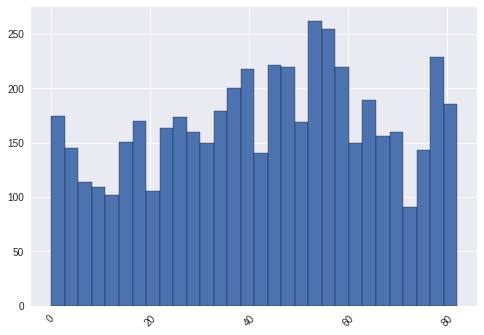

In [89]:
## patient's age
plt.style.use('seaborn')
df['age'].hist(bins = 30, edgecolor='black')
plt.xticks(rotation = 45)
plt.ticklabel_format(useOffset=False, style='plain')

This Histogram shows the age range among potential stroke patients